In [3]:
import csv
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter
import scipy.integrate as spi
import scipy.optimize as opt

In [19]:
dates_ebola = []
countries_ebola = []
with open('ebola_sorted.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header row
    for row in reader:
        countries_ebola.append(row[0])
        dates_ebola.append(row[4])

data = {
    'Country': countries_ebola,
    'Date Onset Inferred': dates_ebola
}

df = pd.DataFrame(data)
df = df[df['Date Onset Inferred'] != 'NA']
countries = df.groupby('Country')
df_guinea = countries.get_group('Guinea')
dates_guinea = [date for date in df_guinea['Date Onset Inferred']]
df_liberia = countries.get_group('Liberia')
dates_liberia = [date for date in df_liberia['Date Onset Inferred']]
df_sierra = countries.get_group('Sierra Leone')
dates_sierra = [date for date in df_sierra['Date Onset Inferred']]
def sort_dates(dates):
    def date_key(date_string):
        return datetime.strptime(date_string, '%d/%m/%Y')
    return sorted(dates, key=date_key)
dates_all = sort_dates(dates_all)
print(dates_all)

['26/12/2013', '26/12/2013', '01/01/2014', '01/01/2014', '01/01/2014', '01/01/2014', '06/01/2014', '06/01/2014', '11/01/2014', '15/01/2014', '20/01/2014', '25/01/2014', '26/01/2014', '29/01/2014', '01/02/2014', '02/02/2014', '03/02/2014', '03/02/2014', '04/02/2014', '04/02/2014', '07/02/2014', '09/02/2014', '11/02/2014', '15/02/2014', '16/02/2014', '17/02/2014', '18/02/2014', '19/02/2014', '21/02/2014', '21/02/2014', '23/02/2014', '23/02/2014', '24/02/2014', '24/02/2014', '24/02/2014', '25/02/2014', '25/02/2014', '27/02/2014', '27/02/2014', '28/02/2014', '28/02/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '01/03/2014', '02/03/2014', '02/03/2014', '03/03/2014', '03/03/2014', '03/03/2014', '03/03/2014', '03/03/2014', '05/03/2014', '06/03/2014', '07/03/2014', '07/03/2014', '07/03/2014', '07/03/2014', '08/03/2014', '09/03/2014', '10/03/2014', '10/03/2014', '10/03/2014', '11/0

In [27]:
def convert_date_to_number(date, earliest_date):
    """convert dates to numbers

    Args:
        date (str): String of a date, it should be in format "%d/%m/%Y" 
        earliest_date (str, optional): Date that has value 0. Defaults to "01/01/2011".

    Returns:
        int: Number of days after the earliest_date
    """
    date_format = "%d/%m/%Y" 
    delta = datetime.strptime(date, date_format) - datetime.strptime(earliest_date, date_format)
    return delta.days

date_nums_guinea = [convert_date_to_number(date, dates_guinea[0]) for date in dates_guinea]
date_nums_liberia = [convert_date_to_number(date, dates_liberia[0]) for date in dates_liberia]
date_nums_sierra = [convert_date_to_number(date, dates_sierra[0]) for date in dates_sierra]
date_nums_all = [convert_date_to_number(date, dates_all[0]) for date in dates_all]

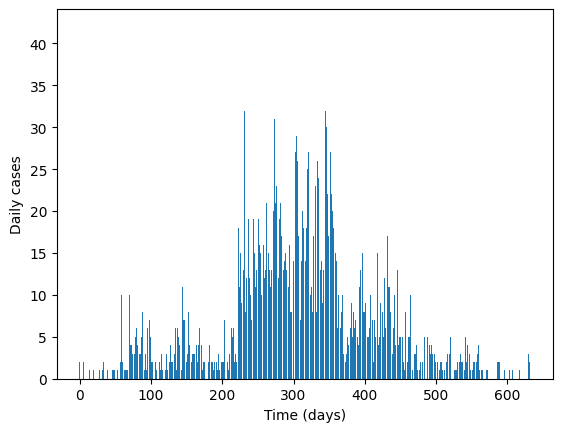

In [38]:
def daily_frequency(event_times):
    counter = Counter(event_times)
    keys = counter.keys()
    values = [counter[key] for key in keys]
    plt.bar(keys, values)
    plt.xlabel('Time (days)')
    plt.ylabel('Daily cases')

daily_frequency(date_nums_guinea)
